# Aula **1**

In [1]:
# Essa é a versão do Geopandas utilizada no curso, caso dê chabu nessa porra!
#!pip install geopandas==0.13.2

In [2]:
import geopandas as gpd

In [3]:
url = 'https://github.com/alura-cursos/curso_geopandas/raw/main/dados/RJ_Municipios_2022.shp'

In [4]:
rj = gpd.read_file(url)

In [5]:
rj.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3300100,Angra dos Reis,RJ,813.420,"MULTIPOLYGON (((-44.51649 -23.03589, -44.51633..."
1,3300159,Aperibé,RJ,94.542,"POLYGON ((-42.11437 -21.61204, -42.11394 -21.6..."
2,3300209,Araruama,RJ,638.276,"POLYGON ((-42.28399 -22.93928, -42.28444 -22.9..."
3,3300225,Areal,RJ,110.724,"POLYGON ((-43.09004 -22.23844, -43.09135 -22.2..."
4,3300233,Armação dos Búzios,RJ,70.977,"MULTIPOLYGON (((-41.91872 -22.77162, -41.91854..."


In [6]:
type(rj)

geopandas.geodataframe.GeoDataFrame

<Axes: >

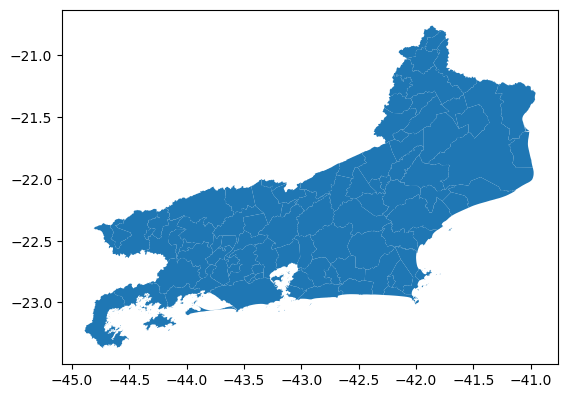

In [7]:
rj.plot()

<Axes: >

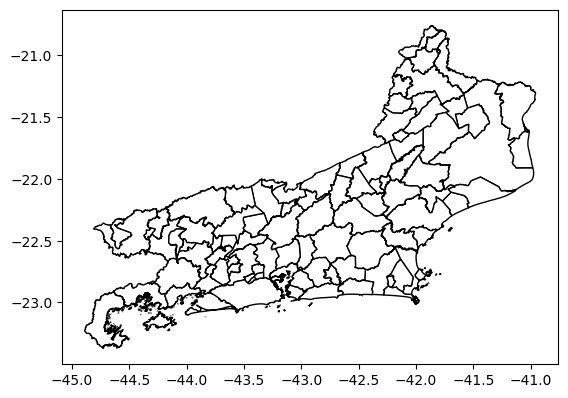

In [8]:
rj.plot(color='white', edgecolor='black')

In [9]:
rj = rj[rj['NM_MUN'] == 'Rio de Janeiro']

<Axes: >

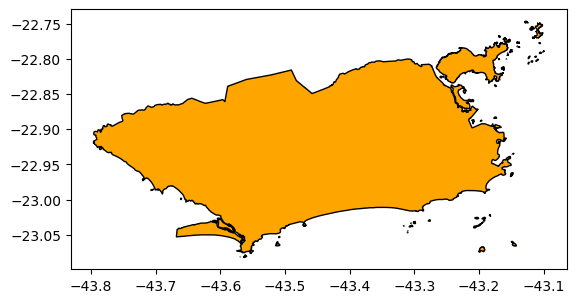

In [10]:
rj.plot(color='orange', edgecolor='black')

In [11]:
rj

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
67,3304557,Rio de Janeiro,RJ,1200.329,"MULTIPOLYGON (((-43.66048 -22.99958, -43.66050..."


In [12]:
rj.to_file('RJ-MUNIC.shp')

In [13]:
rj_munic = gpd.read_file('RJ-MUNIC.shp')

<Axes: >

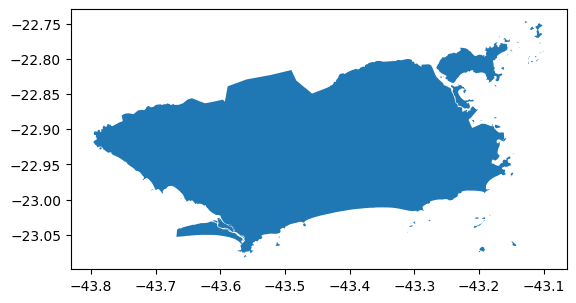

In [14]:
rj_munic.plot()

# Aula **2**

In [15]:
import pandas as pd

In [16]:
url = 'https://raw.githubusercontent.com/alura-cursos/curso_geopandas/main/dados/dados.csv'

In [17]:
df = pd.read_csv(url, sep='\t')

In [18]:
df.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000


In [19]:
type(df)

pandas.core.frame.DataFrame

In [20]:
list = (zip(df['Longitude'], df['Latitude']))

In [21]:
from shapely import Point

In [22]:
pontos_geometricos = [Point(x) for x in zip(df['Longitude'], df["Latitude"])]

In [23]:
pontos_geometricos

[<POINT (-43.463 -23.016)>,
 <POINT (-43.337 -22.943)>,
 <POINT (-43.301 -22.874)>,
 <POINT (-43.413 -22.985)>,
 <POINT (-51.925 -14.235)>,
 <POINT (-43.478 -23.019)>,
 <POINT (-43.247 -22.934)>,
 <POINT (-43.193 -22.982)>,
 <POINT (-51.925 -14.235)>,
 <POINT (-43.175 -22.936)>,
 <POINT (-43.263 -22.919)>,
 <POINT (-49.061 -26.923)>,
 <POINT (-43.303 -23.013)>,
 <POINT (-43.17 -22.953)>,
 <POINT (-43.185 -22.971)>,
 <POINT (-43.355 -23.01)>,
 <POINT (-49.061 -26.923)>,
 <POINT (-43.346 -22.938)>,
 <POINT (-43.182 -22.95)>,
 <POINT (-43.233 -22.922)>,
 <POINT (-43.394 -23)>,
 <POINT (-43.281 -22.906)>,
 <POINT (-43.188 -22.934)>,
 <POINT (-43.502 -23.019)>,
 <POINT (-43.459 -23.023)>,
 <POINT (-43.234 -22.994)>,
 <POINT (-43.199 -22.985)>,
 <POINT (-43.231 -22.977)>,
 <POINT (-43.253 -22.927)>,
 <POINT (-51.925 -14.235)>,
 <POINT (-43.185 -22.971)>,
 <POINT (-43.418 -22.999)>,
 <POINT (-43.308 -23.014)>,
 <POINT (-43.351 -22.989)>,
 <POINT (-43.415 -22.998)>,
 <POINT (-43.199 -22.981)>,

In [24]:
crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}
geo_dados = gpd.GeoDataFrame(df, crs=crs, geometry=pontos_geometricos)

In [25]:
geo_dados.to_file('DATESET.shp')

<Axes: >

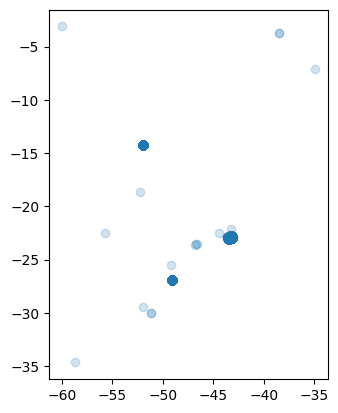

In [26]:
geo_dados.plot(alpha=0.2)

In [27]:
rj.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [28]:
geo_dados.crs

<Geographic 2D CRS: +proj=latlong +ellps=WGS84 +datum=WGS84 +no_defs + ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Vídeo 2.3 - Modificando o sistemas de coordenadas

🤖 Qual a zona UTM em que o município do Rio de Janeiro está inserido?

R: Zona UTM 23S

🤖 Qual o EPSG para zona UTM 23S utilizando o SIRGAS 2000?

R: EPSG 31983

In [29]:
rj = rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [30]:
geo_dados = geo_dados.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

<Axes: >

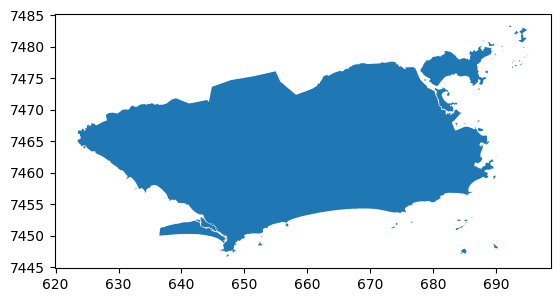

In [31]:
rj.plot()

# Aula **3**

<Axes: >

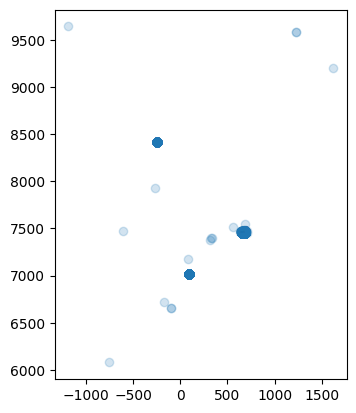

In [32]:
base = rj.plot(color='black')
geo_dados.plot(ax=base, alpha=0.2)

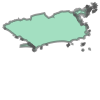

In [33]:
rj.iloc[0].geometry

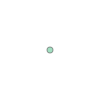

In [34]:
geo_dados.iloc[0].geometry

In [35]:
geo_dados.iloc[0].geometry.within(rj.iloc[0].geometry)

True

In [36]:
geo_dados.shape

(5000, 14)

In [37]:
geo_dados = geo_dados[geo_dados['geometry'].within(rj.iloc[0].geometry)]

In [38]:
geo_dados.shape

(4513, 14)

<Axes: >

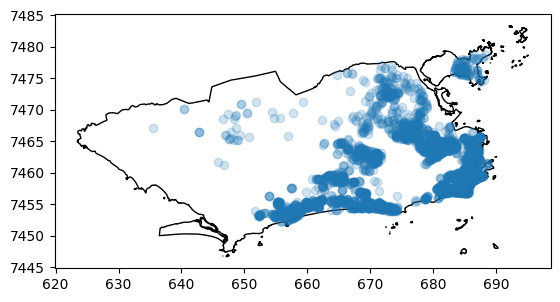

In [39]:
base = rj.plot(color='white', edgecolor='black')
geo_dados.plot(ax=base, alpha=0.2)

In [40]:
url_m = 'https://github.com/allanspadini/curso_geopandas/raw/main/dados/metro.geojson'

In [41]:
metro = gpd.read_file(url_m)

In [42]:
  metro.head()

,objectid,cod,nome,flg_atm,flg_bicicletario,flg_elevador,flg_linha1,flg_linha2,obs,flg_ativa,...,integra_trem,integra_onibus,integra_brt,corredor,integra_vlt,onibus,flg_metro_superficie,metro_superficie,data_inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,NaN,1,...,1,0,0,NaN,0,NaN,0,NaN,1998,POINT (-43.36489 -22.80663)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,NaN,1,...,0,0,0,NaN,0,NaN,0,NaN,1998,POINT (-43.35849 -22.81628)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,NaN,1,...,0,0,0,NaN,0,NaN,0,NaN,1998,POINT (-43.34968 -22.82453)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,NaN,1,...,0,0,0,NaN,0,NaN,0,NaN,1998,POINT (-43.34330 -22.83149)
4,5,5,Colégio,1,1.0,0.0,0,1,NaN,1,...,0,0,0,NaN,0,NaN,0,NaN,1998,POINT (-43.33390 -22.84270)


In [43]:
metro = metro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

<Axes: >

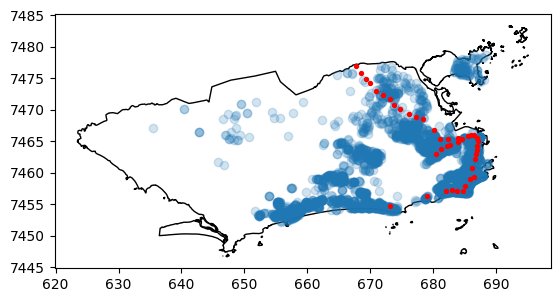

In [44]:
base = rj.plot(color='white', edgecolor='black')
geo_dados.plot(ax=base, alpha=0.2)
metro.plot(ax=base, color='red', markersize=8)

## Aula **4**

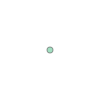

In [45]:
geo_dados.iloc[0].geometry

In [46]:
distancias = metro.distance(geo_dados.iloc[0].geometry)

In [47]:
distancias.min()

15.618532512237714

In [48]:
geo_dados['dist_metro'] = geo_dados['geometry'].apply(lambda x: metro.distance(x).min())

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [49]:
correlacao = geo_dados.corr()

<ipython-input-49-03a6e5561150>:1: FutureWarning: The default value of numeric_only in GeoDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = geo_dados.corr()


<Axes: >

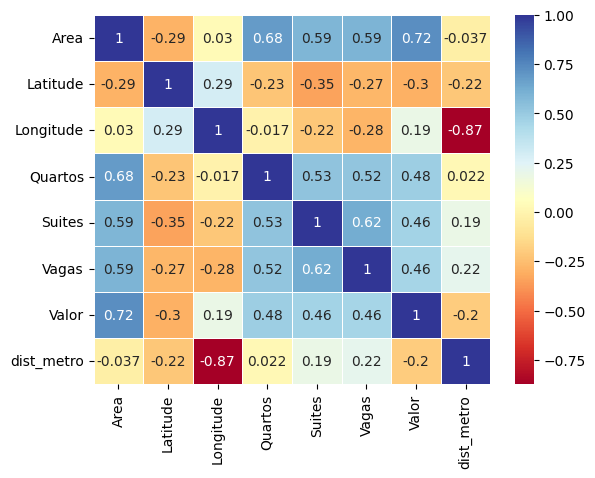

In [50]:
import seaborn as sns

sns.heatmap(correlacao, annot=True, cmap='RdYlBu', linewidth=0.5)

In [51]:
url_t = 'https://github.com/alura-cursos/curso_geopandas/raw/main/dados/trem.geojson'
url_b = 'https://github.com/alura-cursos/curso_geopandas/raw/main/dados/brt.geojson'

In [52]:
trem = gpd.read_file(url_t)
brt = gpd.read_file(url_b)

In [53]:
trem = trem.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
brt = brt.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [54]:
trem = trem[trem.within(rj.iloc[0].geometry)]
brt = brt[brt.within(rj.iloc[0].geometry)]

<Axes: >

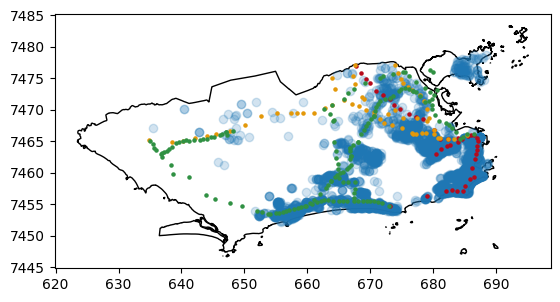

In [55]:
base = rj.plot(color='white', edgecolor='black')
geo_dados.plot(ax=base, alpha=0.2)
metro.plot(ax=base, color='#b60a1c', markersize=5)
trem.plot(ax=base, color='#e39809', markersize=5)
brt.plot(ax=base, color='#309143', markersize=5)

In [56]:
transporte = pd.concat([trem.geometry, metro.geometry, brt.geometry], ignore_index=True)

In [57]:
geo_dados['dist_transporte'] = geo_dados['geometry'].apply(lambda x: transporte.distance(x).min())

In [58]:
correlacao2 = geo_dados.corr()

<ipython-input-58-8e7731d868b8>:1: FutureWarning: The default value of numeric_only in GeoDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao2 = geo_dados.corr()


<Axes: >

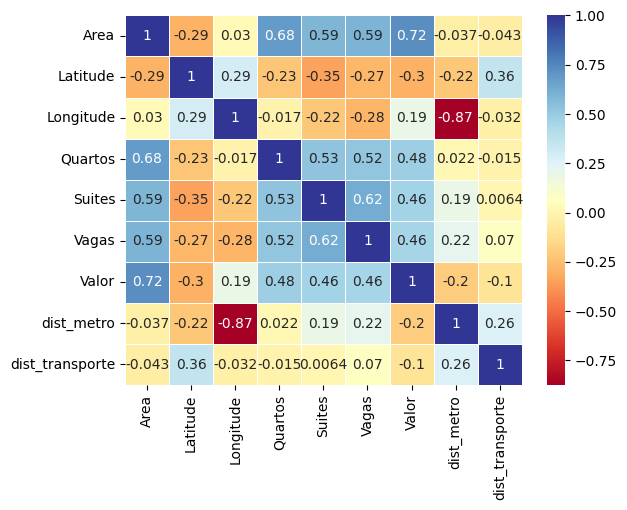

In [59]:
sns.heatmap(correlacao2, annot=True, cmap='RdYlBu', linewidth=0.5)

In [63]:
url_p = '/content/drive/MyDrive/Alura - Cursos (2023)/Alura - Geopandas_trabalhando com dados geoespaciais/Cobertura_Vegetal_e_Uso_da_Terra_2018.geojson'

In [64]:
praias = gpd.read_file(url_p)

In [65]:
praias.head()

,objectid,grupo,classe,formacoes,estagio_sucessional,sigla,ano,legenda,smac_,st_areashape,st_perimetershape,geometry
0,49465,Outros,Corpos d’água continentais,,,Con,2018-06-01 00:00:00+00:00,Corpos d’água continentais,8684.151722,8684.152076,431.969730,"POLYGON ((-43.56631 -23.06286, -43.56616 -23.0..."
1,49466,Outros,Corpos d’água continentais,,,Con,2018-06-01 00:00:00+00:00,Corpos d’água continentais,2209.349128,2209.347164,241.436675,"POLYGON ((-43.59629 -23.04797, -43.59640 -23.0..."
2,49467,Outros,Corpos d’água continentais,,,Con,2018-06-01 00:00:00+00:00,Corpos d’água continentais,17015.388810,17015.386794,468.729476,"POLYGON ((-43.59742 -23.04846, -43.59725 -23.0..."
3,49468,Outros,Corpos d’água continentais,,,Con,2018-06-01 00:00:00+00:00,Corpos d’água continentais,17597.587072,17597.571083,916.464380,"POLYGON ((-43.60753 -23.04328, -43.60773 -23.0..."
4,49469,Antropismo,Vegetação gramíneo-lenhosa,,,Vg,2018-06-01 00:00:00+00:00,Vegetação gramíneo-lenhosa,11834.907080,11834.901131,605.329904,"POLYGON ((-43.57120 -23.05930, -43.57117 -23.0..."


In [66]:
praias = praias.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

<Axes: >

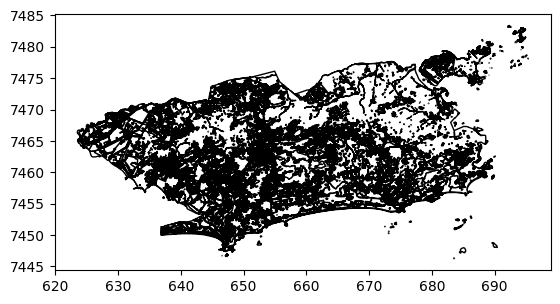

In [67]:
praias.plot(color='white', edgecolor='black')

In [68]:
praias['classe'].unique()

array(['Corpos d’água continentais', 'Vegetação gramíneo-lenhosa',
       'Formação Pioneira com influência marinha',
       'Vegetação arbórea não florestal', 'Áreas Urbanas', 'Praia',
       'Formação Pioneira com influência flúvio-marinh',
       'Formação Pioneira com influência flúvio-lacust', 'Uso agrícola',
       'Floresta Ombrófila Densa', 'Afloramento Rochoso', 'Solo exposto',
       'Reflorestamento', 'Atividades de Extração Mineral',
       'Corpos d’água costeiros'], dtype=object)

In [69]:
praias = praias[praias['classe'] == 'Praia']

<Axes: >

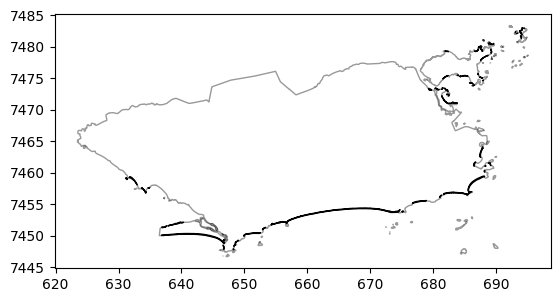

In [70]:
base = rj.plot(color='white', edgecolor='black', alpha=0.4)
praias.plot(ax=base, color='white', edgecolor='black')

In [72]:
geo_dados['dist_praia'] = geo_dados['geometry'].apply(lambda x: praias.distance(x).min())

In [74]:
correlacao3 = geo_dados.corr()

<ipython-input-74-d195ca624766>:1: FutureWarning: The default value of numeric_only in GeoDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao3 = geo_dados.corr()


<Axes: >

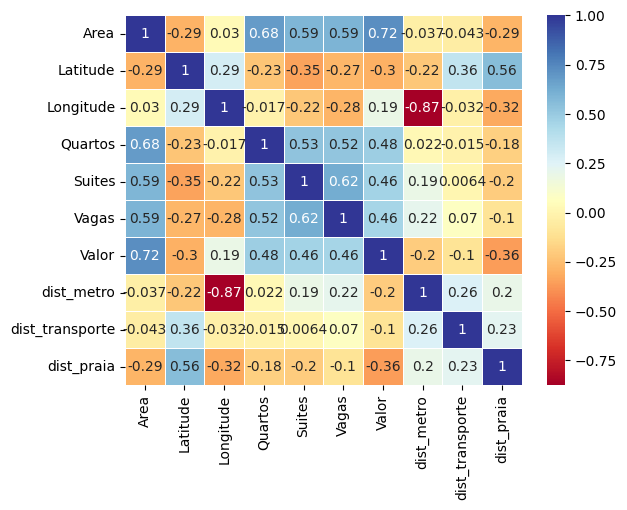

In [75]:
sns.heatmap(correlacao3, annot=True, cmap='RdYlBu', linewidth=0.5)

<Axes: xlabel='dist_praia', ylabel='Valor'>

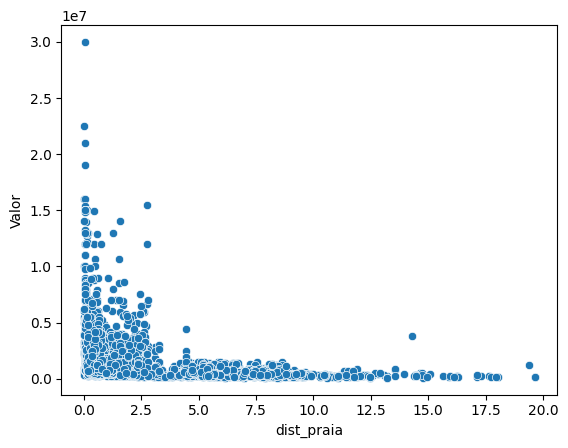

In [76]:
sns.scatterplot(x='dist_praia', y='Valor', data=geo_dados)